In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Step 2: Load the Dataset
df = pd.read_csv("/home/ayush/College/Semester_2/ML_with_Python/Bengaluru_House_Data.csv")

# Step 3: Display Basic Info
print("First 5 rows:")
print(df.head())

print("\nColumns:")
print(df.columns)

print("\nNull Values:")
print(df.isnull().sum())


First 5 rows:
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  

Columns:
Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

Null Values:
area_type          0
availability       0
location           1
siz

In [3]:
# Drop irrelevant or too text-heavy columns
df = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)

# Drop rows with nulls
df = df.dropna()

# Convert 'size' to number of BHKs
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

# Convert total_sqft to numeric (some values are ranges like "2100-2850")
def convert_sqft(sqft):
    try:
        return float(sqft)
    except:
        parts = sqft.split('-')
        if len(parts) == 2:
            return (float(parts[0]) + float(parts[1])) / 2
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df = df.dropna()

# Final data for modeling
X = df[['total_sqft', 'bath', 'bhk']]
y = df['price']  # price in lakhs


In [5]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [7]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nR² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f} Lakhs")



R² Score: 0.45
Mean Absolute Error: 45.80 Lakhs


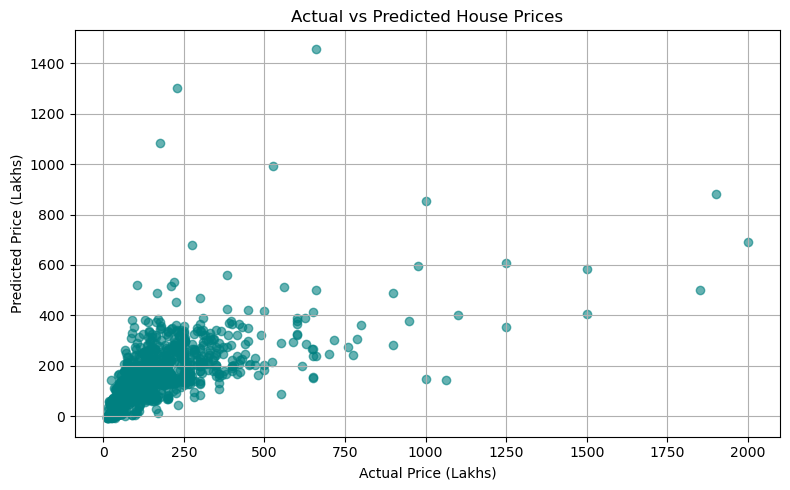

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.savefig("actual_vs_predicted.png")
